In [124]:
import numpy as np

# Parameters for the MSCI Index.
initial_stock_price = 70
annual_return = 0.10
annual_volatility = 0.15
trading_days_per_year = 251
num_years = 4
num_simulations = 10000

daily_return = (1 + annual_return)**(1 / trading_days_per_year) - 1
daily_volatility = annual_volatility / np.sqrt(trading_days_per_year)

def simulate_stock_growth(initial_price, mean_growth_percentage, volatility, iterations):
    """
    Returns `Float[]` representing one simulation of stock growth over X `iterations`. Each value in
    the array represents the value of the stock price at that particular iteration.
    """
    prices = [initial_price]
    for _ in range(iterations):
        growth_percentage = np.random.normal(mean_growth_percentage, volatility)
        new_price = prices[-1] * (1 + growth_percentage)
        prices.append(new_price)
    return prices

num_days = num_years * trading_days_per_year
simulations = []

for _ in range(num_simulations):
    simulations.append(simulate_stock_growth(initial_stock_price, daily_return, daily_volatility, num_days))



In [125]:
final_prices = [sim[-1] for sim in simulations]
p_50 = np.percentile(final_prices, 50)
p_90 = np.percentile(final_prices, 90)
p_99 = np.percentile(final_prices, 99)
p_10 = np.percentile(final_prices, 10)
p_01 = np.percentile(final_prices, 1)
p_005 = np.percentile(final_prices, 0.05)
p_001 = np.percentile(final_prices, 0.01)
p_0001 = np.percentile(final_prices, 0.001)

print(f"p50 final stock price: {p_50:.2f} AUD {(p_50 / initial_stock_price - 1) * 100:.2f}% total growth")
print(f"p90 final stock price: {p_90:.2f} AUD {(p_90 / initial_stock_price - 1) * 100:.2f}% total growth")
print(f"p99 final stock price: {p_99:.2f} AUD {(p_99 / initial_stock_price - 1) * 100:.2f}% total growth")
print(f"p10 final stock price: {p_10:.2f} AUD {(p_10 / initial_stock_price - 1) * 100:.2f}% total growth")
print(f"p01 final stock price: {p_01:.2f} AUD {(p_01 / initial_stock_price - 1) * 100:.2f}% total growth")
print(f"p005 final stock price: {p_005:.2f} AUD {(p_005 / initial_stock_price - 1) * 100:.2f}% total growth")
print(f"p001 final stock price: {p_001:.2f} AUD {(p_001 / initial_stock_price - 1) * 100:.2f}% total growth")
print(f"p0001 final stock price: {p_0001:.2f} AUD {(p_0001 / initial_stock_price - 1) * 100:.2f}% total growth")

p50 final stock price: 97.99 AUD 39.98% total growth
p90 final stock price: 143.82 AUD 105.45% total growth
p99 final stock price: 195.17 AUD 178.82% total growth
p10 final stock price: 67.01 AUD -4.28% total growth
p01 final stock price: 48.68 AUD -30.45% total growth
p005 final stock price: 36.60 AUD -47.72% total growth
p001 final stock price: 33.91 AUD -51.56% total growth
p0001 final stock price: 28.72 AUD -58.98% total growth


In [126]:
from math import floor

def simulate_investment(prices, initial_investment, investment_amount, daily_investment_period, num_days, simulation_number):
    num_stocks_owned = 0
    # While we invest X amount every Y days, the number of stocks won't perfectly equal our savings.
    # This acts as a buffer.
    # Start with the initial_investment amount.
    working_savings = initial_investment
    total_contributions = 0

    for i in range(num_days):
        if (i % daily_investment_period == 0):
            stock_price = prices[i]
            working_savings = working_savings + investment_amount
            if (working_savings >= stock_price):
                num_stocks_to_buy = floor(working_savings / stock_price)
                invested_amount = num_stocks_to_buy * stock_price
                
                num_stocks_owned = num_stocks_owned + num_stocks_to_buy
                working_savings = working_savings - invested_amount
                total_contributions = total_contributions + investment_amount
            else:
                print(f"WARN: Simulation {simulation_number} -> Not enough working savings to buy 1 single stock for nth price {i} -> working_savings ${working_savings:.2f}, stock_price ${stock_price:.2f}")

    final_price = prices[-1]
    left_over = working_savings
    current_value = num_stocks_owned * final_price
    growth = num_stocks_owned * final_price - total_contributions
    growth_percentage = (growth / total_contributions)

    return (num_stocks_owned, final_price, left_over, total_contributions, current_value, growth, growth_percentage)
            

In [ ]:
# STARTHERE: INTERESTING. The initial investment seems to increase your chance that you don't lose money... Does that seem right?
initial_investment = 50000
annual_investment_amount = 20800

### Weekly ###
annual_investment_frequency = 52
investment_amount = annual_investment_amount / annual_investment_frequency
daily_investment_period = round(trading_days_per_year / annual_investment_frequency)

print(f"Investing ${investment_amount:.2f} every {daily_investment_period} trading days for {num_years} years with initial investment ${initial_investment:.2f}.")
print(f"Number of simulations: {len(simulations)}")
print(f"Length of price simulation: {len(simulations[0])}")

growth_percentages_weekly = []
for (i, price_simulation) in enumerate(simulations):
    (num_stocks_owned, final_price, left_over, total_contributions, current_value, growth, growth_percentage) = simulate_investment(price_simulation, initial_investment, investment_amount, daily_investment_period, num_days, i)
    # print("")
    # print(f"Number of stocks owned: {num_stocks_owned}")
    # print(f"Price of stock: ${final_price:.2f}")
    # print(f"Total invested: ${total_contributions:.2f}")
    # print(f"Current value: ${current_value:.2f}")
    # print(f"Growth: ${growth:.2f}")
    # print(f"Growth as % of contributions: {growth_percentage:.2f}%")
    growth_percentages_weekly.append(growth_percentage)

### Monthly ###
annual_investment_frequency = 12
investment_amount = annual_investment_amount / annual_investment_frequency
daily_investment_period = round(trading_days_per_year / annual_investment_frequency)

print(f"Investing ${investment_amount:.2f} every {daily_investment_period} trading days for {num_years} years with initial investment ${initial_investment:.2f}.")
print(f"Number of simulations: {len(simulations)}")
print(f"Length of price simulation: {len(simulations[0])}")

growth_percentages_monthly = []
for (i, price_simulation) in enumerate(simulations):
    (num_stocks_owned, final_price, left_over, total_contributions, current_value, growth, growth_percentage) = simulate_investment(price_simulation, initial_investment, investment_amount, daily_investment_period, num_days, i)
    growth_percentages_monthly.append(growth_percentage)


### Quarterly ###
annual_investment_frequency = 4
investment_amount = annual_investment_amount / annual_investment_frequency
daily_investment_period = round(trading_days_per_year / annual_investment_frequency)

print(f"Investing ${investment_amount:.2f} every {daily_investment_period} trading days for {num_years} years with initial investment ${initial_investment:.2f}.")
print(f"Number of simulations: {len(simulations)}")
print(f"Length of price simulation: {len(simulations[0])}")

growth_percentages_quarterly = []
for (i, price_simulation) in enumerate(simulations):
    (num_stocks_owned, final_price, left_over, total_contributions, current_value, growth, growth_percentage) = simulate_investment(price_simulation, initial_investment, investment_amount, daily_investment_period, num_days, i)
    growth_percentages_quarterly.append(growth_percentage)

Investing $400.00 every 5 trading days for 4 years with initial investment $50000.00.
Number of simulations: 10000
Length of price simulation: 1005
Investing $1733.33 every 21 trading days for 4 years with initial investment $50000.00.
Number of simulations: 10000
Length of price simulation: 1005
Investing $5200.00 every 63 trading days for 4 years with initial investment $50000.00.
Number of simulations: 10000
Length of price simulation: 1005


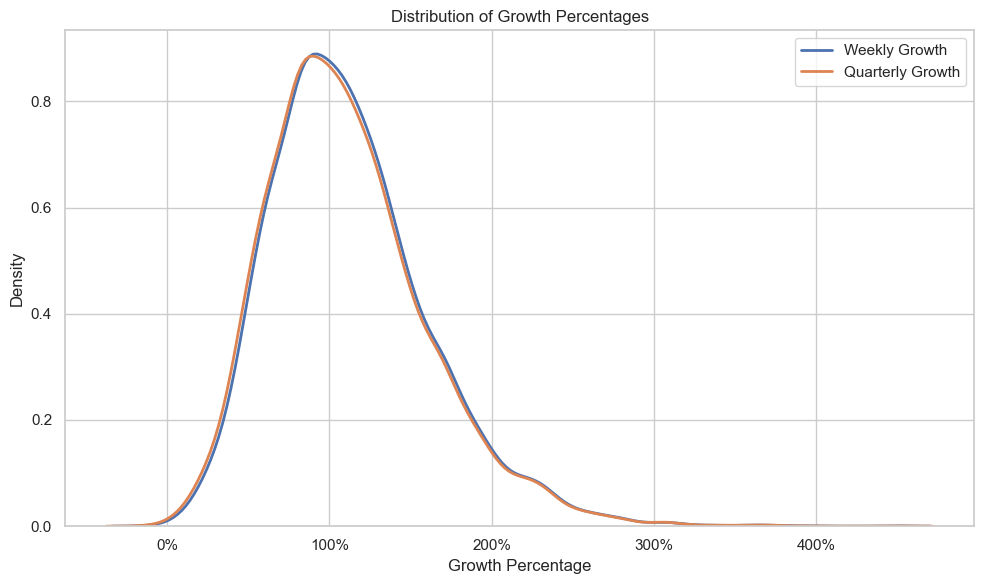

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot KDE for both weekly and monthly growth percentages
sns.kdeplot(growth_percentages_weekly, label='Weekly Growth', linewidth=2)
sns.kdeplot(growth_percentages_quarterly, label='Quarterly Growth', linewidth=2)


# Labels and formatting
plt.title('Distribution of Growth Percentages')
plt.xlabel('Growth Percentage')
plt.ylabel('Density')
plt.legend()

# Format x-axis as percentages (if your values are like 0.05 = 5%)
import matplotlib.ticker as mtick
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()




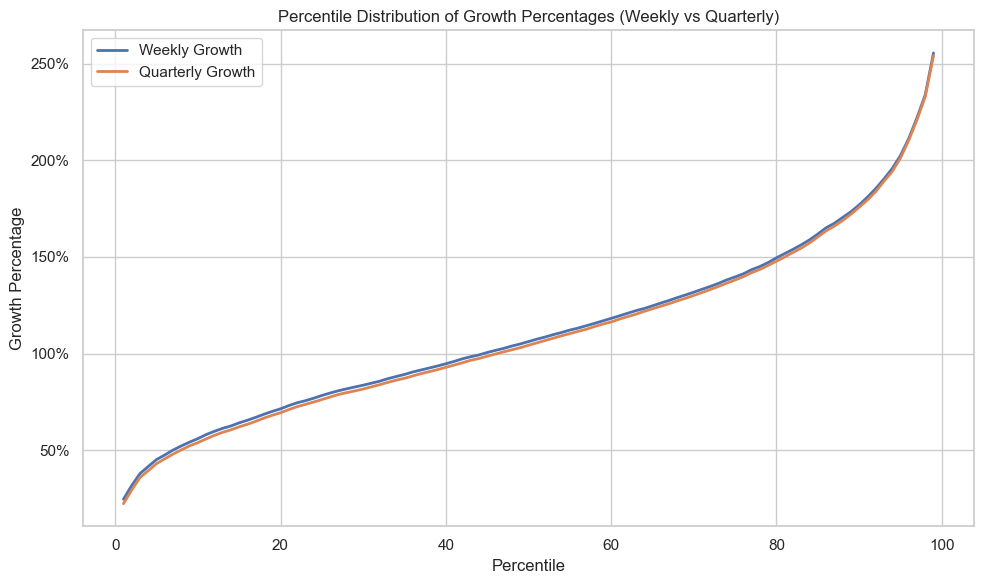

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentiles from 1 to 99
percentiles = np.arange(1, 100)
weekly_values = np.percentile(growth_percentages_weekly, percentiles)
monthly_values = np.percentile(growth_percentages_monthly, percentiles)
quarterly_values = np.percentile(growth_percentages_quarterly, percentiles)

# Set style and figure
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the percentile curves
plt.plot(percentiles, weekly_values, label='Weekly Growth', linewidth=2)
plt.plot(percentiles, quarterly_values, label='Quarterly Growth', linewidth=2)

# Labels and formatting
plt.title('Percentile Distribution of Growth Percentages (Weekly vs Quarterly)')
plt.xlabel('Percentile')
plt.ylabel('Growth Percentage')
plt.legend()

# Format y-axis as percent (if values are like 0.05 = 5%)
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()
